In [2]:
import torch
import os

In [226]:
model_file = "../embeddings/saves/emb_epoch_19.model"

In [227]:
import pickle
with open(model_file, 'rb') as f:
    obj = pickle.load(f)

In [228]:
#torch.load(model_file)
import sys
sys.path.insert(0,'../embeddings')
from model import BasicModel
from dataloader import GeneExpressionFeatureDataset

In [229]:
train_ds = GeneExpressionFeatureDataset("../data/mouse_matrix.h5", 
                                        gene_file="../data/kinase_indices.txt", train=True)

In [230]:
device = torch.device('cpu')
model = BasicModel(len(train_ds.gene_ids), train_ds.nfeatures())
model.load_state_dict(torch.load(model_file, map_location=device))

../embeddings/model.py:67: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  torch.nn.init.normal(self.layer_e.weight, mean=0.0, std=0.02)
../embeddings/model.py:69: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  torch.nn.init.normal(self.layer_f.weight, mean=0.0, std=0.02)


In [231]:
weight_e = model.layer_e.weight.data.cpu().numpy()

In [232]:
weight_f = model.layer_f.weight.data.cpu().numpy()

In [233]:
import numpy as np
vectors = np.concatenate([weight_e.T, weight_f.T])

In [234]:
from umap import umap_

In [235]:
embedding = umap_.UMAP().fit_transform(vectors)

In [236]:
embedding.shape
hue=["expression"]*weight_e.shape[1]+["feature"]*weight_f.shape[1]

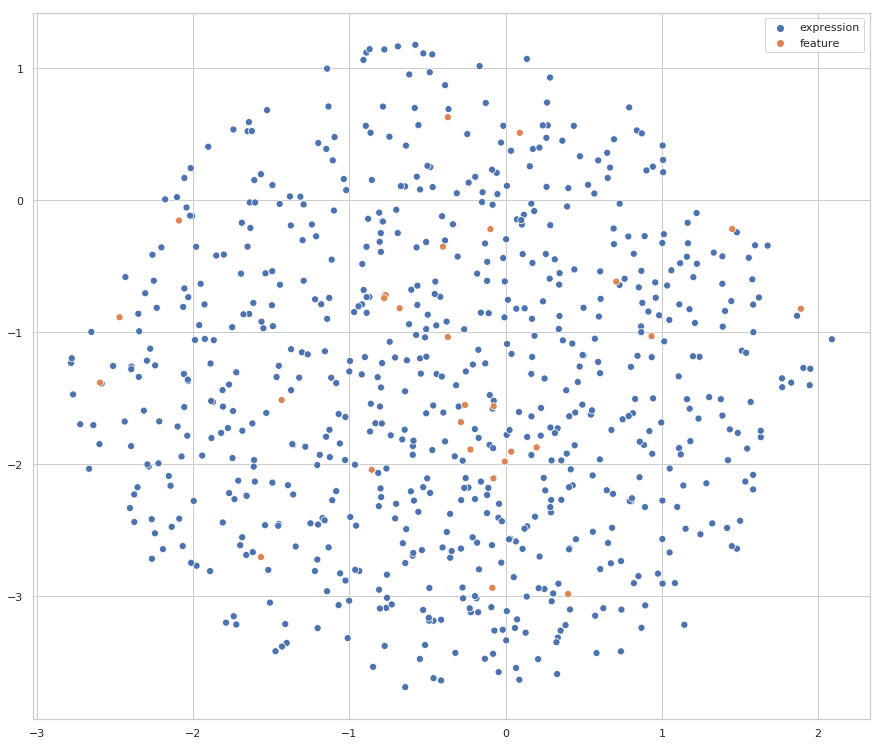

In [248]:
import seaborn as sns; sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,13))

cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=hue, cmap=cmap, s=50)#, data=tips)

In [204]:
e1, f1 = train_ds[0]
e2, f2 = train_ds[1]

In [205]:
ve1 = np.dot(weight_e, e1.T)
vf1 = np.dot(weight_f, f1.T)
ve2 = np.dot(weight_e, e2.T)
vf2 = np.dot(weight_f, f2.T)

In [206]:
vectors = np.concatenate([weight_e.T, weight_f.T, [ve1, vf1, ve2, vf2]])

In [207]:
vectors.shape

(726, 100)

In [208]:
embedding2 = umap_.UMAP(metric="euclidean").fit_transform(vectors)

In [239]:
hue2=["expression"]*weight_e.shape[1]+["feature"]*weight_f.shape[1]+["v1", "v1", "v2", "v2"] #+["expression", "feature"]*2#

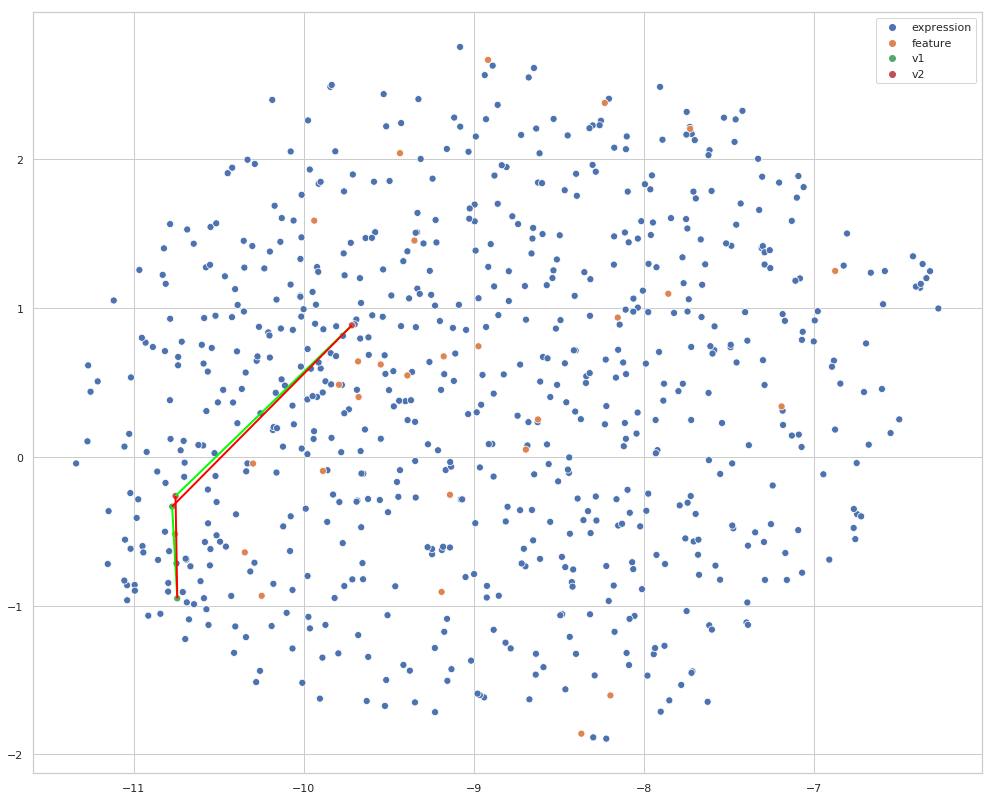

In [249]:
fig = plt.figure(figsize=(17,14))
from matplotlib import collections  as mc
ax = sns.scatterplot(x=embedding2[:, 0], y=embedding2[:, 1], hue=hue2, s=50)#, data=tips)



lines = [embedding2[-4:-2, :], embedding2[-2:, :], embedding2[-3:-1, :], embedding2[[-4, -1], :]]
c = np.array([(0, 1, 0, 1),(0, 1, 0, 1),(1, 0, 0, 1),  (1, 0, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=2)
ax.add_collection(lc)